## Importación de librerías

In [1]:
# Manipulación de datos
import numpy as np
import pandas as pd
import math

# Estadística y normalización
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [2]:
df = pd.read_csv('../data/dataset_estudiantes_EDA.csv', index_col=0)

df.head()

,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
0,48.830601,86.640182,6.675694,25,Fácil,Sí,Tarde,Lectura/Escritura,84.4,1
1,80.825707,83.449655,4.616844,18,Difícil,No,Tarde,NaN,72.0,1
2,90.383694,74.623607,7.755246,25,Fácil,No,Mañana,Lectura/Escritura,80.0,1
3,81.878257,82.849841,8.592826,23,Fácil,No,NaN,Visual,78.2,1
4,66.254179,54.539935,6.671840,21,Medio,No,NaN,Auditivo,66.0,1


## Gestión de nulos

In [3]:
# Identificar todas las columnas nueméricas del DataFrame
num_cols = df.select_dtypes(include='number').columns

# Identificación de valores nulos en el DataFrame
cantidad_nulos = df.isna().sum()  # Suma valores nulos por columna
cantidad_nulos = cantidad_nulos[cantidad_nulos != 0]  # Filtra solo columnas con valores nulos

cantidad_nulos  # Muestra el resultado

horas_sueno                  150
horario_estudio_preferido    100
estilo_aprendizaje            50
dtype: int64

In [4]:
# # Análisis de valores únicos en columnas categóricas con valores nulos
# for col in cantidad_nulos.index.to_list():
#     if col in df.select_dtypes(include='object'):
#         display(df[col].value_counts())
# Análisis de valores únicos en columnas categóricas con valores nulos

# Identificar todas las columnas categóricas
cat_cols = df.select_dtypes(include='object').columns

# Filtrar solo las categóricas que tienen nulos
cat_nulls = [col for col in cat_cols if df[col].isna().sum() > 0]

# Crear variables indicadoras para cada una
for col in cat_nulls:
    df[f"{col}_missing"] = df[col].isna().astype(int)
# mostrar las columnas que tienen valores nulos
df[cat_nulls].isna().sum()

horario_estudio_preferido    100
estilo_aprendizaje            50
dtype: int64

## Imputación de valores nulos

- **Variables categóricas**  
  Se sustituyen los valores faltantes por la categoría genérica **`"Unknown"`**, asegurando que ninguna etiqueta válida se vea desplazada y permitiendo identificar explícitamente la ausencia de dato.

- **Variables numéricas**  
  Se imputan los nulos con la **mediana** de cada columna, una medida robusta frente a valores atípicos que preserva la distribución original de los datos.

> Esta estrategia de imputación mantiene la integridad del dataset y aplica un tratamiento adaptado al tipo de variable, sin necesidad de eliminar filas con información parcial.  

In [5]:
# Valor desconocido
val = 'Unknown'

# Imputación de valores categóricos con un valor desconocido
for col in cat_cols:
    # Reemplazar los valores nulos por el valor desconocido
    df[col] = df[col].fillna(val)
    

# Imputación de valores numéricos con la mediana
for col in num_cols:
    # Reemplazar los valores nulos por la mediana de la columna
    df[col] = df[col].fillna(df[col].median())


In [6]:
# Comprobación de nulos
df.isna().sum().sum()

np.int64(0)

## Gestión outliers

### Identificación de outliers mediante boxplot

/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_28385/1336993300.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_28385/1336993300.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_28385/1336993300.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_28385/1336993300.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

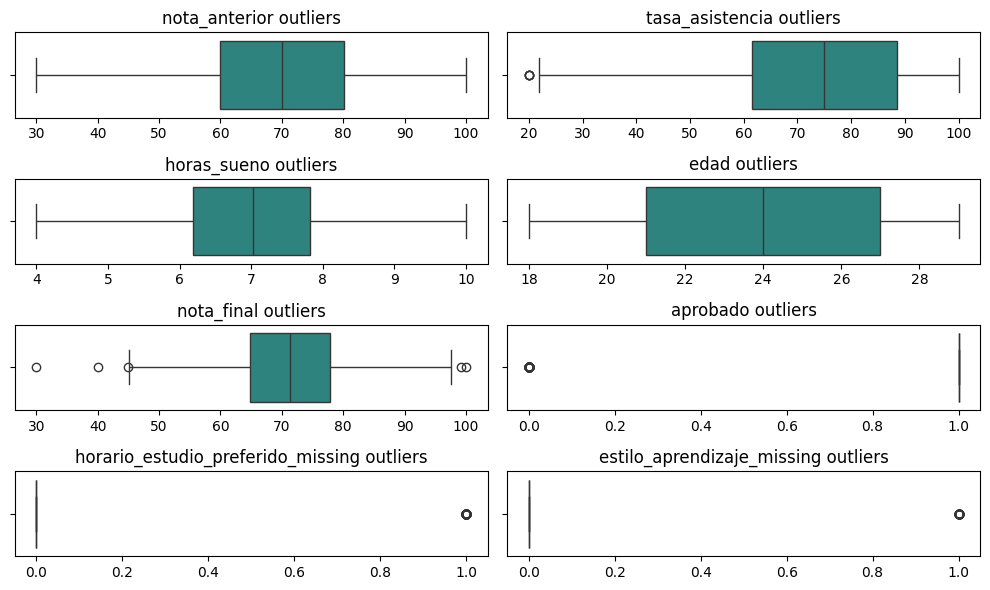

In [7]:
# Visualización de outliers en variables numéricas mediante diagramas de caja

# Seleccionar solo columnas numéricas del DataFrame
df_num = df.select_dtypes(include=np.number)
cols_num = df_num.columns

# Calcular el número de gráficos y filas necesarias
n_plots = len(cols_num)
num_rows = math.ceil(n_plots / 2)  # Se distribuyen en 2 columnas

# Ajustar dinámicamente el tamaño de la figura
width = 5 * 2
height = 1.5 * num_rows
size = (width, height)

# Crear la estructura de subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=size)
axes = axes.flat  # Convertir matriz de ejes a lista plana

# Crear un boxplot para cada variable numérica
for i, col in enumerate(cols_num):
   sns.boxplot(
       x=col,
       data=df_num,
       palette="viridis",
       ax=axes[i]
   )

   axes[i].set_title(f'{col} outliers')
   axes[i].set_xlabel('')  # Eliminar etiqueta del eje x para mayor claridad

# Eliminar el último gráfico si sobra un espacio vacío
if n_plots % 2 != 0:
   fig.delaxes(axes[-1])

# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.show()


### Detección de outliers mediante el método IQR

In [8]:
# Diccionario para almacenar los outliers detectados en cada columna
outliers_dict_iqr = {}

# Iterar sobre cada columna numérica
for col in df_num.columns:
    # Calcular los cuartiles Q1 y Q3
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1  # Rango intercuartil

    # Definir límites para detectar outliers (método de la valla)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar outliers en la columna actual
    outliers = df_num[(df_num[col] < lower_bound) | (df_num[col] > upper_bound)]
    
    # Almacenar los outliers en el diccionario
    outliers_dict_iqr[col] = outliers[col]

# 1) Resumen: número de outliers por variable
outlier_counts = {col: series.shape[0] for col, series in outliers_dict_iqr.items()}
outlier_summary = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['n_outliers'])
print("Número de outliers por variable:")
print(outlier_summary)

# 2) Mostrar ejemplos de outliers (hasta 5 por variable)
for col, series in outliers_dict_iqr.items():
    if not series.empty:
        print(f"\nEjemplos de outliers en '{col}':")
        print(series.drop_duplicates().head(5).sort_values().to_frame())


Número de outliers por variable:
                                   n_outliers
nota_anterior                               0
tasa_asistencia                             4
horas_sueno                                 0
edad                                        0
nota_final                                  5
aprobado                                  102
horario_estudio_preferido_missing         100
estilo_aprendizaje_missing                 50

Ejemplos de outliers en 'tasa_asistencia':
     tasa_asistencia
603        20.000000
744        20.050934

Ejemplos de outliers en 'nota_final':
     nota_final
579        30.0
323        40.0
822        44.9
606        99.2
927       100.0

Ejemplos de outliers en 'aprobado':
    aprobado
11         0

Ejemplos de outliers en 'horario_estudio_preferido_missing':
   horario_estudio_preferido_missing
3                                  1

Ejemplos de outliers en 'estilo_aprendizaje_missing':
   estilo_aprendizaje_missing
1                          

In [9]:
outliers_dict_iqr['horario_estudio_preferido_missing']

3      1
4      1
10     1
21     1
28     1
      ..
936    1
957    1
963    1
974    1
994    1
Name: horario_estudio_preferido_missing, Length: 100, dtype: int64

In [10]:
outliers_dict_iqr['aprobado']

11     0
13     0
24     0
25     0
44     0
      ..
971    0
974    0
984    0
988    0
993    0
Name: aprobado, Length: 102, dtype: int64

### Detección de outliers mediante el método Z-score

In [11]:
# Diccionario para almacenar los outliers detectados en cada columna
outliers_dict_z = {}

for col in df_num.columns:

    # Filtrar los outliers usando |Z| > 3
    outliers = df_num[np.abs(zscore(df_num[col])) > 3]

    # Almacenar los outliers en el diccionario
    outliers_dict_z[col] = outliers

outliers_df = pd.concat(outliers_dict_z.values(), keys=outliers_dict_z.keys())


Número de outliers por variable (Z-score):
                                   n_outliers
nota_anterior                               0
tasa_asistencia                             0
horas_sueno                                 0
edad                                        0
nota_final                                  2
aprobado                                    0
horario_estudio_preferido_missing           0
estilo_aprendizaje_missing                 50
Valores nulos tras imputación: 0


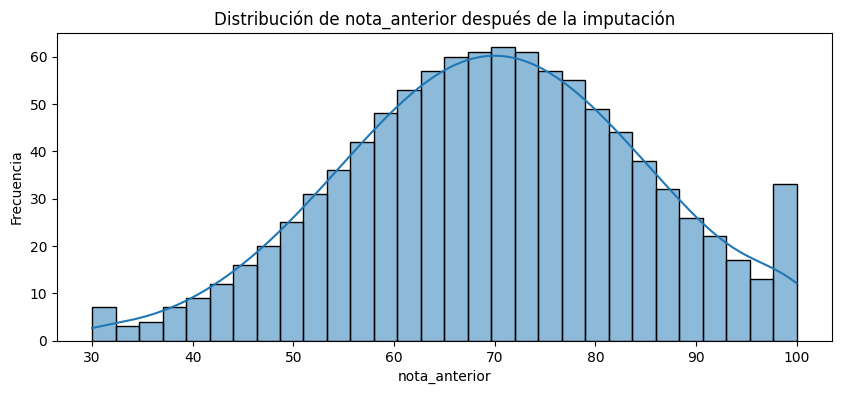

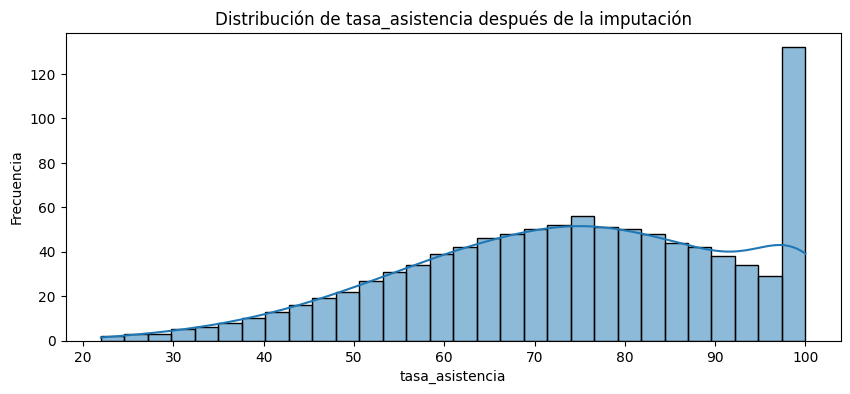

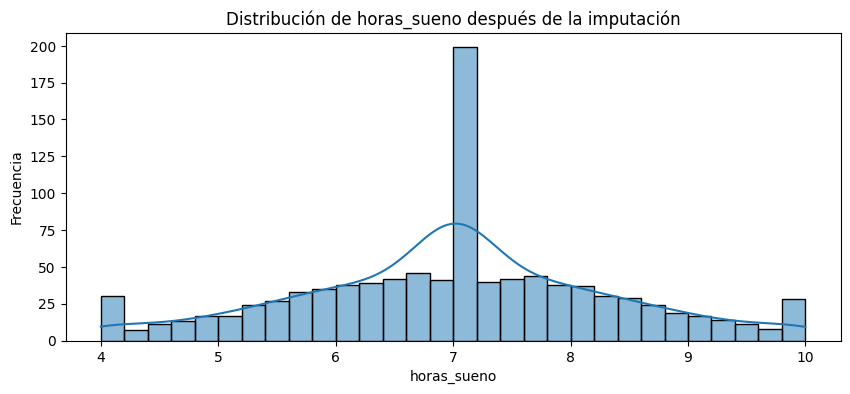

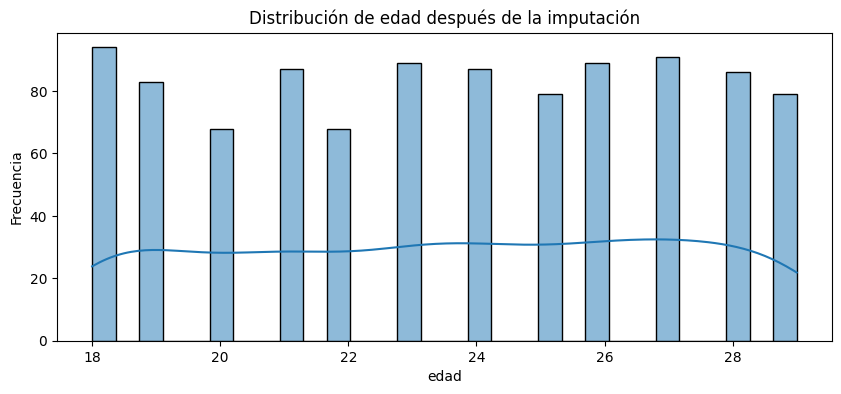

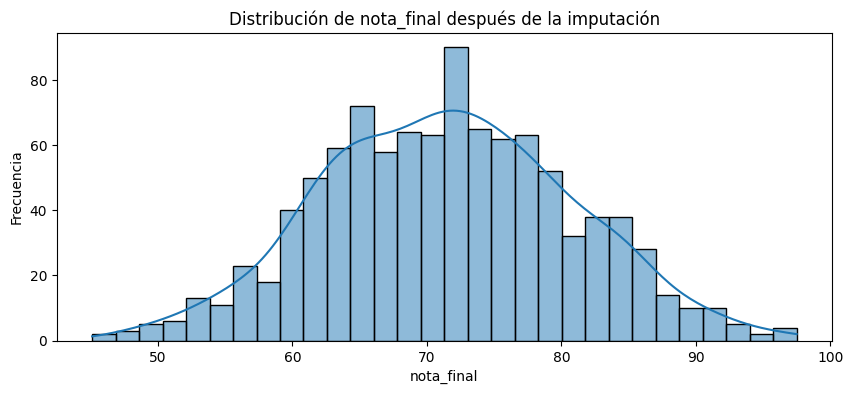

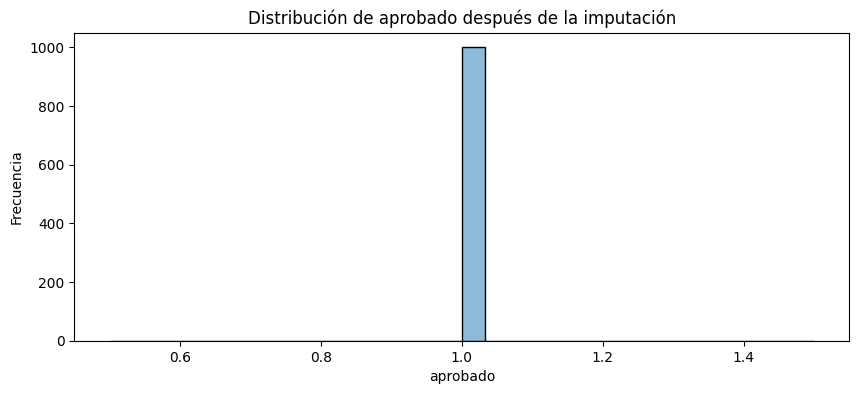

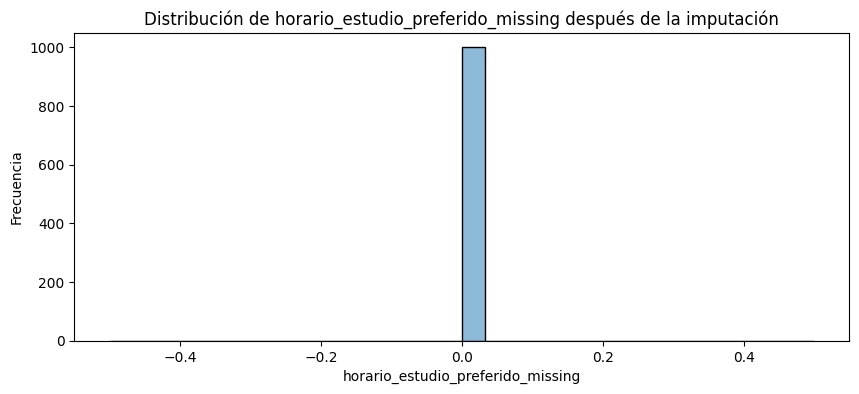

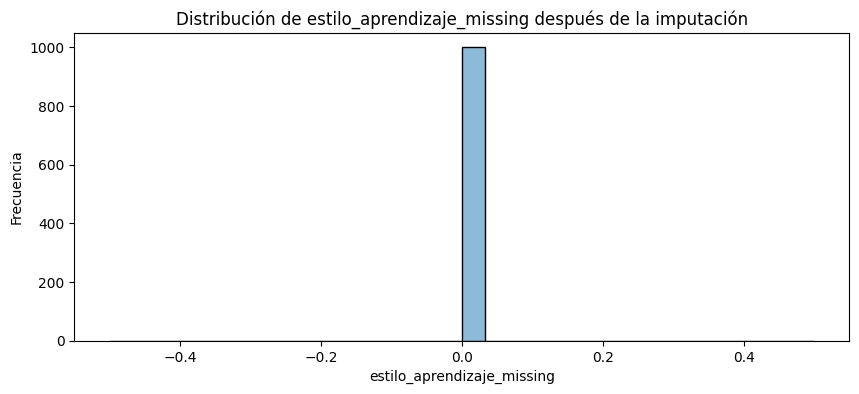

In [12]:
# Resumen: número de outliers por variable usando Z-score
outlier_counts_z = {col: series.shape[0] for col, series in outliers_dict_z.items()}
outlier_summary_z = pd.DataFrame.from_dict(outlier_counts_z, orient='index', columns=['n_outliers'])
print("Número de outliers por variable (Z-score):")
print(outlier_summary_z)



# Imputación de outliers usando el método de la mediana
for col in df_num.columns:
    # Calcular cuartiles y mediana
    q1 = df_num[col].quantile(0.25)
    q3 = df_num[col].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    median_value = df_num[col].median()
    
    # Reemplazar los outliers por la mediana
    df_num[col] = np.where(
        (df_num[col] < lower) | (df_num[col] > upper),
        median_value,
        df_num[col]
    )

# Comprobar si se han eliminado los outliers
print("Valores nulos tras imputación:", df_num.isna().sum().sum())

# Visualización de la distribución de las variables numéricas después de la imputación
for col in df_num.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_num[col], bins=30, kde=True)
    plt.title(f'Distribución de {col} después de la imputación')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()




---

## Para regresión

La variable objetivo es `nota_final`

In [13]:
# Hacemos una copia del DataFrame
df_reg = df.copy()

# Seleccionamos la variable objetivo
tv = 'nota_final'

### Codificación

In [14]:
cat_cols = df_reg.select_dtypes(include='O').columns.to_list()

In [15]:
cat_cols

['nivel_dificultad',
 'tiene_tutor',
 'horario_estudio_preferido',
 'estilo_aprendizaje']

Selección de los métodos de codificación

In [16]:
onehot_cols = ['tiene_tutor'] # la que se le aplicará OneHotEncoder
target_cols = [x for x in cat_cols if x not in onehot_cols] # las que no estan en onehot_cols 'nivel_dificultad','horario_estudio_preferido','estilo_aprendizaje'

`OneHotEncoding`

In [17]:
# Codificación OneHot
onehot_encoder = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')
onehot_encoded = onehot_encoder.fit_transform(df_reg[onehot_cols])
onehot_feature_names = onehot_encoder.get_feature_names_out()
df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_feature_names, index=df_reg.index)

# Concatenar con el DataFrame original y eliminar las columnas originales
df_reg = pd.concat([df_reg.drop(columns=onehot_cols), df_onehot], axis=1)

`TargetEncoding`

In [18]:
# Codificación Target Encoding para algunas variables categóricas con category_encoders
# Columnas: 'nivel_dificultad','horario_estudio_preferido','estilo_aprendizaje'
target_encoder = TargetEncoder(cols=target_cols)
df_reg[target_cols] = target_encoder.fit_transform(df_reg[target_cols], df_reg[tv])

### Escalado

`MinMaxScaler`
Se llevan las variables entre 1 y 0

In [19]:
# scaler = MinMaxScaler()
# df_scaler = df_reg.copy()
# df_scaler[df_scaler.drop(columns=[tv]).columns] = scaler.fit_transform(df_scaler.drop(columns=[tv]))

In [20]:
# df_scaler.head()
# Guardar el DataFrame procesado

### Guardamos el dataframe preprocesado

In [21]:
df_reg.to_csv('../Data/df_regresion.csv') # se guarda el dataframe con codificación y sin escalar

---

## Para clasificación

La variable objetivo es `Aprobado`

In [22]:
# Carga del DataFrame original para clasificación
df_clas = df.copy()

# Seleccionamos la variable objetivo
tv = 'aprobado'

In [23]:
df_clas

,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado,horario_estudio_preferido_missing,estilo_aprendizaje_missing
0,48.830601,86.640182,6.675694,25,Fácil,Sí,Tarde,Lectura/Escritura,84.4,1,0,0
1,80.825707,83.449655,4.616844,18,Difícil,No,Tarde,Unknown,72.0,1,0,1
2,90.383694,74.623607,7.755246,25,Fácil,No,Mañana,Lectura/Escritura,80.0,1,0,0
3,81.878257,82.849841,8.592826,23,Fácil,No,Unknown,Visual,78.2,1,1,0
4,66.254179,54.539935,6.671840,21,Medio,No,Unknown,Auditivo,66.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,79.453807,87.058862,5.581576,22,Medio,Sí,Noche,Lectura/Escritura,78.9,1,0,0
996,87.246126,90.160085,6.063783,24,Medio,Sí,Mañana,Auditivo,73.6,1,0,0
997,53.324469,61.525951,6.562950,29,Fácil,No,Noche,Lectura/Escritura,65.0,1,0,0
998,88.309605,96.326078,6.691088,21,Medio,Sí,Noche,Kinestésico,73.8,1,0,0


### Codificación

In [24]:
cat_cols = df_clas.select_dtypes(include='O').columns.to_list()

Selección de los métodos de codificación

In [25]:
cat_cols


['nivel_dificultad',
 'tiene_tutor',
 'horario_estudio_preferido',
 'estilo_aprendizaje']

In [26]:
onehot_cols = ['tiene_tutor']  # la que se le aplicará OneHotEncoder

target_cols = ['nivel_dificultad', 'horario_estudio_preferido']

label_cols = ['estilo_aprendizaje']

`OneHotEncoding`

In [27]:
# Codificación OneHot
onehot_encoder = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')
onehot_encoded = onehot_encoder.fit_transform(df_clas[onehot_cols])
onehot_feature_names = onehot_encoder.get_feature_names_out()
df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_feature_names, index=df_clas.index)

# Concatenar con el DataFrame original y eliminar las columnas originales
df_clas = pd.concat([df_clas.drop(columns=onehot_cols), df_onehot], axis=1)

`TargetEncoding`

In [28]:
df_clas.isna().sum()

nota_anterior                        0
tasa_asistencia                      0
horas_sueno                          0
edad                                 0
nivel_dificultad                     0
horario_estudio_preferido            0
estilo_aprendizaje                   0
nota_final                           0
aprobado                             0
horario_estudio_preferido_missing    0
estilo_aprendizaje_missing           0
tiene_tutor_No                       0
tiene_tutor_Sí                       0
dtype: int64

In [29]:
# Codificación Target Encoding para algunas variables categóricas con category_encoders
target_encoder = TargetEncoder(cols=target_cols)
df_clas[target_cols] = target_encoder.fit_transform(df_clas[target_cols], df_clas[tv])

`LabelEncoding`

In [30]:
# Para LabelEncoding necesitamos aplicarlo a las columnas de una en una
df_clas[label_cols] = df_clas[label_cols].apply(lambda col: LabelEncoder().fit_transform(col))

### Escalado

`MinMaxScaler`

In [31]:
scaler = MinMaxScaler()
df_clas[df_clas.columns] = scaler.fit_transform(df_clas)

### Guardamos el dataframe preprocesado

In [32]:
df_clas.to_csv('../Data/df_clasificacion.csv')